<a href="https://colab.research.google.com/github/dewdotninja/embedded_iot/blob/master/sensors/fsr/fsr_solution.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Force Sensing Resistors
<p />Force Sensing Resistors (FSR) are a
polymer thick film (PTF) device which
exhibits a decrease in resistance with an
increase in the force applied to the
active surface. Its force sensitivity is
optimized for use in human touch
control of electronic devices. FSRs are
not a load cell or strain gauge, though
they have similar properties. FSRs are
not suitable for precision measurements.

<p align="center">
<img src="https://drive.google.com/uc?id=1SqjUqzlZzGRAC9eQabyWR1KSro5omn59" width=300 alt="Figure 1"/>
</p>
<div align="center"><b>Figure 1 force resistive sensor 0.5" </b></div>

<h3>Force vs. Resistance</h3>
<p />The force vs. resistance characteristic
shown in Figure 2 provides an overview
of FSR typical response behavior. For
interpretational convenience, the force
vs. resistance data is plotted on a log/log
format.
<p align="center">
<img src="https://drive.google.com/uc?id=13dWRbShWZroBDqtGHExArsTnPCgehGK6" width=600 alt="Figure 2"/>
</p>


<b>Example 1 : </b>Figure 3 shows a connection diagram of FSR with an ESP8266 board. A voltage divider circuit, formed by 
the sensor and a 10K$\Omega$ resistor, is connected from 3.3 volts to GND. The middle node is then wired to analog input A0 
of ESP8266. When some force is applied to the FSR, that causes its resistance to change, and hence the force is converted to 
voltage variation at A0 pin.
<p align="center">
<img src="https://drive.google.com/uc?id=1JBLGvgpYadSj1FgAPpw7rITqn0iwlVfh" width=500 alt="Figure 3"/>
</p>
<div align="center"><b>Figure 3 an example of FSR interface to ESP8266</b></div>
<p />For precise usage, this circuit must be calibrated in some way. Here we only want to give a crude example, so the 
resistance v.s. force graph in Figure 2 is used.

### To do : 
* Let's assume the force applied to the FSR ranges from 0 - 1 Kg. From the resistance vs. force in Figure 2, compute min and 
max voltage at A0
* The ESP8266 has 10-bit ADC; i.e., the value ranges from 0 - 1023 corresponding to 0 - 3.3 Volts (neglecting voltage offset). 
Find a linear equation that maps ADC reading to the force exerted on the sensor.

### Optional : 
* Build hardware setup as in Figure 3 and use serial monitor to verify the ADC readout.
* Make a simple IoT applicaiton with a force gauge, and perhaps a feedview display.


<h3>Solution</h3>
<p />First import the libraries 

In [12]:
import numpy as np
import matplotlib.pyplot as plt

<p />Note that the information in Figure 2 is not adequate. With no force on the FSR, its resistance is not determined, though 
we can assume a very high value. In fact, from our experiment, the measured voltage with no force applied to FCR equals 3.3 volts.
So we can use a large resistance, say, $3 M\Omega$ to yield $V_s = 3.3$ volts.

In [7]:
Vp = 3.3
R1 = 10000
Rs = 3000000
Vs_max = (Rs/(R1+Rs))*Vp
print("With no force, Vs ="+str(Vs_max))

With no force, Vs =3.289036544850498


With 1000 g force exerted on sensor, from Figure 2 the resistance of FSR drops to $1 K\Omega$. Compute $V_s$

In [4]:
Rs = 1000
Vs_min = (Rs/(R1+Rs))*Vp
print("With 1000 g force, Vs ="+str(Vs_min))

With 1000 g force, Vs =0.3


So, with $V_s$ as x-axis ranging from 0.3 to 3.3 volts, we want a straight line graph that passes through two $(V_s,F_s)$ points 
$(0.3,1000)$ and $(3.3,0)$. The slope $m$ is computed as
$$
m = \frac{0-1000}{3.3-0.3}
$$

In [10]:
m = -1000/(3.3-0.3)
print(m)

-333.3333333333333


<p />So , considering the point $(V_s,F_s) = (3.3,0) $, the linear equation representing $F_s(V_s)$ can be derived as 
$F_s - 0 = m(V_s - 3.3 )$
or
$$
F_s = -333.33V_s + 1100
$$
<p />Let's plot this equation to verify 

In [17]:
Vs = np.arange(0.3,3.4,0.1)  # np.arange(min, max, step)
Fs = m*Vs + 1100

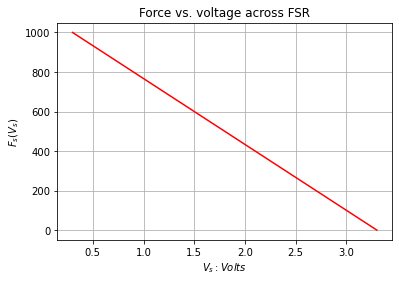

In [18]:
plt.figure()
plt.plot(Vs,Fs,'r-')
plt.xlabel('$V_s : Volts$')
plt.ylabel('$F_s(V_s)$')
plt.grid(True)
plt.title('Force vs. voltage across FSR')
plt.show()


<div align="right">Last update : Jan 15, 2021</div>

<p align="center">
<img src="https://drive.google.com/thumbnail?id=13bzT7Rmy3bzvE7TiS0yfQo94kpxMuipF" alt="dewninja"/>
</p>
<div align="center">dew.ninja<br>Copyright 2021</div>